In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import hourglass_magnetic_field as hgm
import circular_magnetic_field as crm
import magnetic_field_modeling as mfm

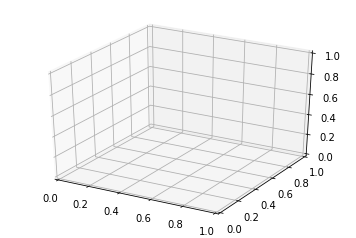

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')

In [50]:


n_points = 100
scan = 2
spacing = 0.5

x_points, y_points, z_points = np.meshgrid(np.arange(-scan, scan, spacing),
                                           np.arange(-scan, scan, spacing),
                                           np.arange(-scan*10, scan*10, spacing/100))

# Model parameters.
h = 0.3257
k_array = [0.9549,0.4608,0.6320]
disk_radius = 3.8918
uniform_B0 = 3.3118

B_x, B_y, B_z = hgm.hourglass_magnetic_field_cart(x_points,y_points,z_points,h,k_array,disk_radius,uniform_B0)


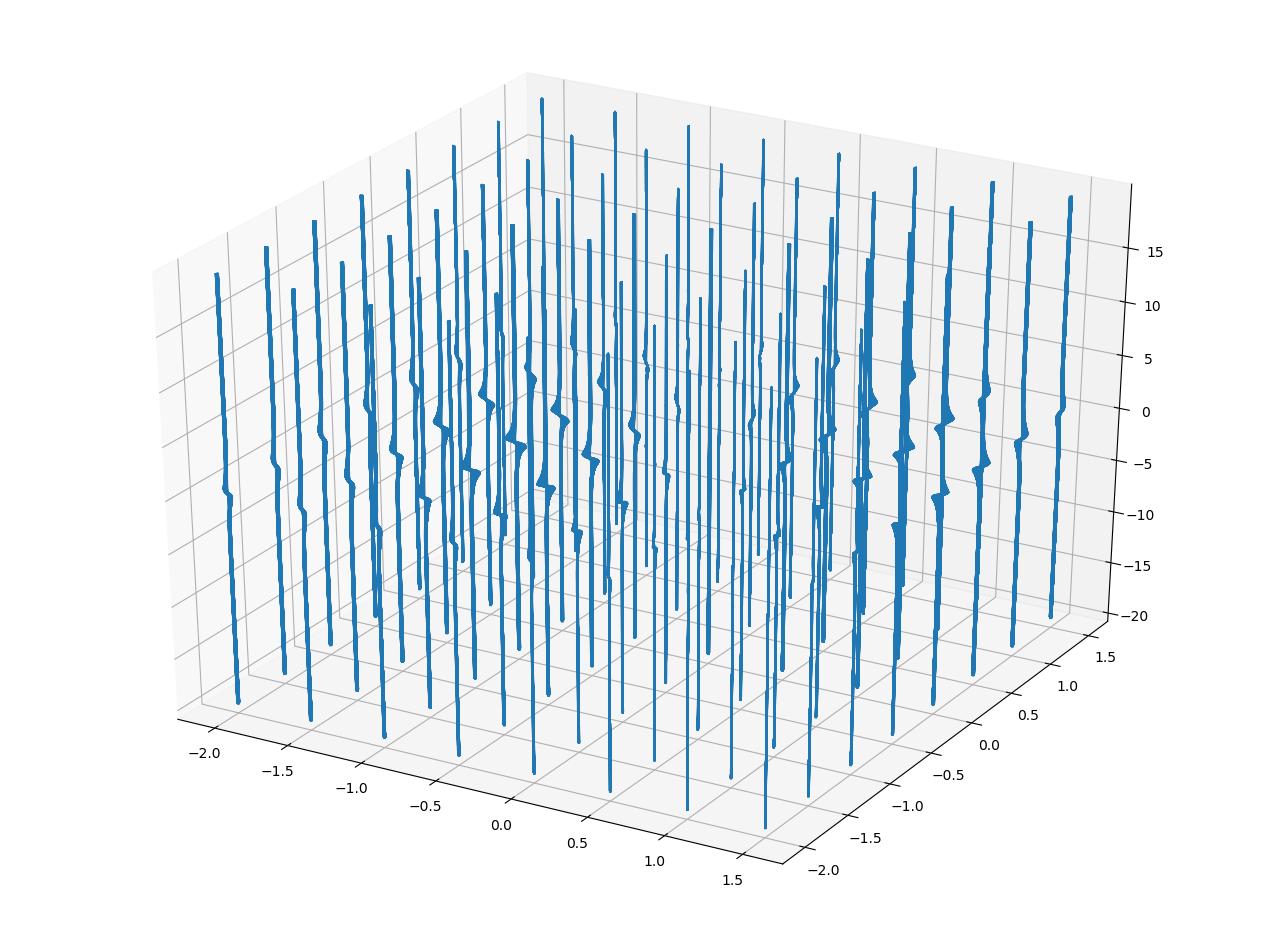

In [13]:
fig = plt.figure(figsize=(16,12),dpi=100)
ax = fig.gca(projection='3d')

quiver = True
scale = 10

if quiver:
    ax.quiver(x_points, y_points, z_points, B_x, B_y, B_z,length=0.1*scan,arrow_length_ratio=0.2,normalize=True)
    plt.show()
else:
    ax.scatter(np.ravel(x_points + B_x/scale),
                np.ravel(y_points + B_y/scale),
                np.ravel(z_points + B_z/scale),
              s=0.1,
              marker='.')
    ax.set_xlim((-scan,scan))
    ax.set_ylim((-scan,scan))
    plt.show()


scan = 1
bottom = -scan * 2
n_points = 10
itter = 1000
spacing_factor = 1 / 1000

n_lines = 100

# Model parameters.
h = 0.3257
k_array = [0.9549,0.4608,0.6320]
disk_radius = 3.8918
uniform_B0 = 3.3118

flow_fig = plt.figure()
flow_ax = flow_fig.add_subplot(111, projection='3d')

for linedex in range(n_lines):
    # Generate a random point on the bottom.
    x_val = np.random.rand()
    y_val = np.random.rand()
    z_val = bottom
    
    # For line values.
    x_line_vals = []
    y_line_vals = []
    z_line_vals = []
    
    # Begin movmement
    for itterdex in range(itter):
        B_x_flow, B_y_flow, B_z_flow = hgm.hourglass_magnetic_field_cart(x_points,y_points,z_points,
                                                                         h,k_array,disk_radius,uniform_B0)
        
        x_val += B_x_flow * spacing_factor
        y_val += B_y_flow * spacing_factor
        z_val += B_z_flow * spacing_factor
        
        x_line_vals.append(x_val)
        y_line_vals.append(y_val)
        z_line_vals.append(z_val)
        
    flow_ax.plot(x_line_vals,y_line_vals,z_line_vals)
    
    # Reset
    del x_line_vals,y_line_vals,z_line_vals
    
flow_ax.show()
        
    
    

In [ ]:
#print(np.array(x_line_vals).shape)

In [ ]:
# Inital parameters
disk_radius = 3.8918
h = 0.3257
k_array = [0.9549,0.4608,0.6320]
uniform_B0 = 3.3118

r = np.linspace(0,1,10000) * disk_radius
z = 0

pltB_z = hgm.Ewer_Basu__B_z(r, z, h, k_array, disk_radius, uniform_B0)

plt.plot(r/disk_radius,pltB_z/uniform_B0)
plt.show()

In [ ]:
# Inital parameters 
disk_radius = 3.8918
k_array = [0.9549,0.4608,0.6320]
h = 0.3257
uniform_B0 = 3.3118

z = np.array(0.26 * disk_radius)
r = np.linspace(0,1,10000) * disk_radius

pltB_r = hgm.Ewer_Basu__B_r(r, z, h, k_array, disk_radius)

plt.plot(r/disk_radius,pltB_r/uniform_B0)
plt.show()

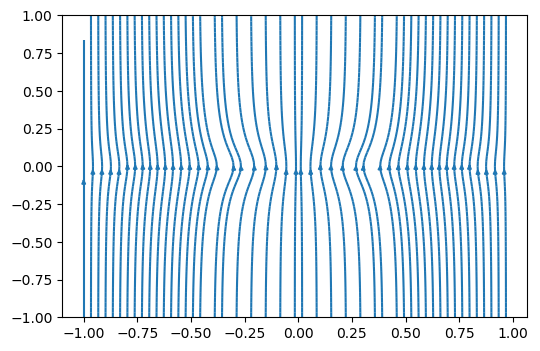

In [51]:
fig2 = plt.figure(dpi=100)
ax2 = fig2.add_subplot(projection=111)

# Inital conditions.
k_array = [0.9549,0.4608,0.6320]
disk_radius = 3.8918
h = 0.3257
uniform_B0 = 3.3118

stream_scan = disk_radius * 1

stream_r,stream_z = np.meshgrid(np.linspace(-stream_scan,stream_scan,1000),
                                np.linspace(-stream_scan,stream_scan,1000))

stream_B_r = hgm.Ewer_Basu__B_r(stream_r, stream_z, h, k_array, disk_radius)
stream_B_z = hgm.Ewer_Basu__B_z(stream_r, stream_z, h, k_array, disk_radius, uniform_B0)

plt.streamplot(stream_r / disk_radius, stream_z / disk_radius, stream_B_r, stream_B_z,
              density=2,minlength=0.75,arrowsize=0.5)
plt.show()

In [ ]:
fig3 = plt.figure(dpi=100)
ax3 = fig3.add_subplot(projection=111)

# Circular function.
def inverse_square(r):
    return 1/r**2

stream_scan = 5

stream_x,stream_y = np.meshgrid(np.linspace(-stream_scan,stream_scan,1000),
                                np.linspace(-stream_scan,stream_scan,1000))

stream_B_x, stream_B_y, _ = crm.circular_magnetic_field_cart(stream_x, stream_y, 0, inverse_square)

plt.streamplot(stream_x, stream_y, stream_B_x, stream_B_y,
              density=1,arrowsize=0.5)

plt.show()

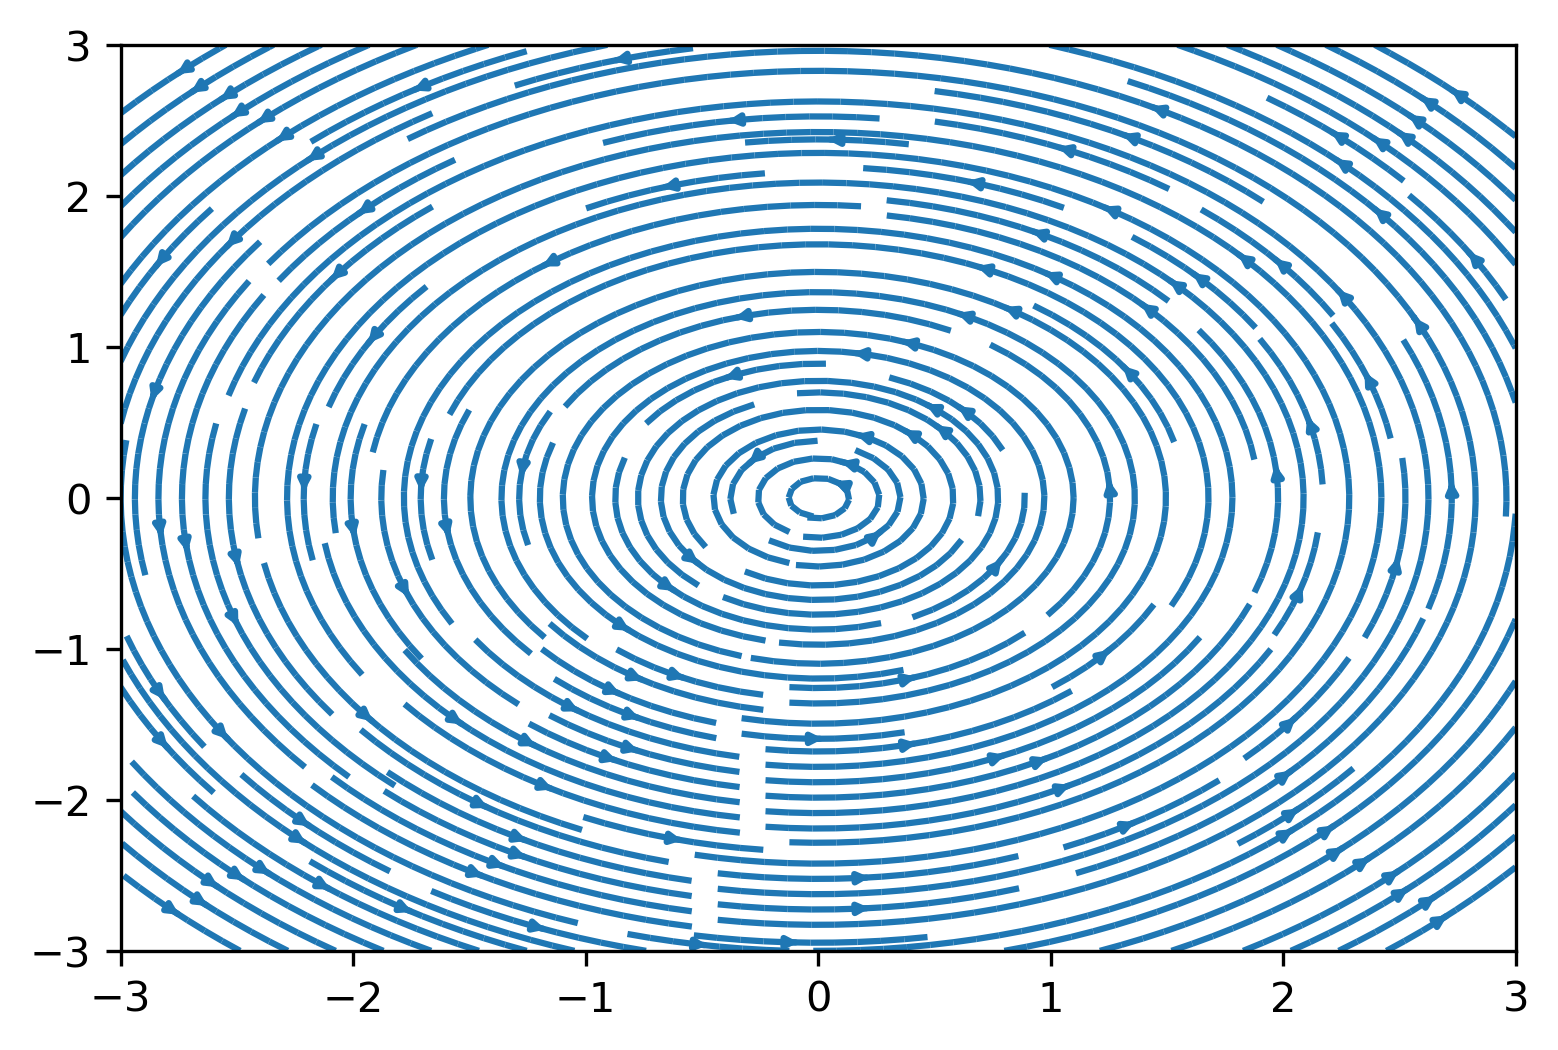

In [57]:
stream_scan = 3
contri = 0

hg_center = [0,0]
k_array = [0.9549,0.4608,0.6320]
disk_radius = 3.8918 
h = 0.3257
uniform_B0 = 3.3118

cr_center = [0,0]
def inverse_square(r):
    return 1/r**2

hybrid_funct = mfm.combine_hourglass_circular(contri,
                                                    hg_center, h, k_array, disk_radius, uniform_B0,
                                                    cr_center, cir_function=inverse_square)

#def mono_funct(x,y):
#    hyp = np.hypot(x,y)
#    dirx = x/hyp
#    diry = y/hyp
#    return dirx*hyp**-2,diry*hyp**-2


stream_x,stream_y= np.meshgrid(np.linspace(-stream_scan,stream_scan,100),
                                np.linspace(-stream_scan,stream_scan,100))

stream_B_x, stream_B_y = hybrid_funct(stream_x,stream_y)

stream_B_x_t = stream_B_y
stream_B_y_t = -stream_B_x

plt.figure(dpi=300)
plt.streamplot(stream_x, stream_y, stream_B_x, stream_B_y,
             density=2,arrowsize=0.5)
#plt.streamplot(stream_x, stream_y, stream_B_x_t, stream_B_y_t,color='r',
#              density=2,arrowsize=0.5)
plt.show()

In [30]:
hybrid_funct?